In [1]:
!pip install torch
!pip install torchvision

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from math import exp

## Build Back  Propagation with numpy

* 0과 1의 정답 레이블을 가진 데이터 셋에서 0과 1로 분류를 하고 싶어요
* dataset 은 2차원 벡터로 이루어져 있다.
* 정답 레이블은 각각 0과 1로 되어 있다.
* 레이어를 직접 만들어서 코드 구현을 한다.

In [13]:
n_name = ['activate_function','forward_propagate','transfer','update_weights','backward_propagate_error','transfer_derivative']
# 활성화 함수, 순전파, 비선형 결합, 가중치 업데이트, 오차 역전파 에러 계산, 비선형 함수 미분을 의미한다.

In [65]:
from random import seed
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs): #입력층의 노드수/은닉층의 노드수/출력층의 노드수
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)] # 가중치는 초기화 하는 기법이 따로 존재 +1 은 bias 표현
    print('hidden : ' , hidden_layer)
    #n input 만큼 가중치 생성 및 n hidden 만큼 층 생성
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    print('output : ', output_layer)
    network.append(output_layer)
    return network
 
seed(0) # 값 고정
network = initialize_network(2, 1, 2)
network

hidden :  [{'weights': [0.8444218515250481, 0.7579544029403025, 0.420571580830845]}]
output :  [{'weights': [0.25891675029296335, 0.5112747213686085]}, {'weights': [0.4049341374504143, 0.7837985890347726]}]


[[{'weights': [0.8444218515250481, 0.7579544029403025, 0.420571580830845]}],
 [{'weights': [0.25891675029296335, 0.5112747213686085]},
  {'weights': [0.4049341374504143, 0.7837985890347726]}]]

In [ ]:
[
    [
        {'weights': [0.14116593371706354, 0.7621847097876072, 0.7474005213392795]}
    ],
    
    [
        {'weights': [0.6291943546166798, 0.1426222278501701]},
        {'weights': [0.11966390537211424, 0.45775547626312885]}
    ]
]

In [4]:
def forward_propagate(weights, inputs):
    a_1 = weights[-1] # w 끝값. bias
    for i in range(len(weights)-1):
        a_1 += weights[i] * inputs[i] # 가중합 계산
    return a_1 # a_1은 a 함수의 결과값

In [5]:
def activate_function(a_1):
    return 1.0 / (1.0 + exp(-a_1))

In [6]:
def transfer(network, row): 
    inputs = row 
    for layer in network:
        new_inputs = [] 
        for neuron in layer:
            a_1 = forward_propagate(neuron['weights'], inputs) 
            neuron['output'] = activate_function(a_1) 
            new_inputs.append(neuron['output']) 
        inputs = new_inputs
 
    return inputs

In [7]:
def transfer_derivative(output):
    return output * (1.0 - output)

In [77]:
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        
        if i == len(network) -1 :                                 # 현재 층이 출력층인 경우, -1 하는 이유는 리스트의 마지막 요소를 인덱싱하기 위해
            for j in range(len(layer)):                           # 1부터 출력층의 노드 개수까지
                neuron = layer[j] 
                errors.append(2*(neuron['output'] - expected[j])) # 제곱 오차 함수를 사용해 오차를 계산한 결과를 미분한 것을 error에 추가해준다.
        else:                                                     # 그렇지 않은 경우
            for j in range(len(layer)): 
                error = 0.0
                for neuron in network[i + 1]:                     
                    error += (neuron['weights'][j] * neuron['delta'])  # neuron['delta'] -> 개별 뉴런의 오차 항목 // 체인룰 적용
                errors.append(error)
        for j in range(len(layer)): 
            neuron = layer[j] 
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [78]:
def update_weights(network, row, l_rate):
    for layer in range(len(network)):
        inputs = row[:-1]
        if layer != 0:
            inputs = [neuron['output'] for neuron in network[layer - 1]]
        for neuron in network[layer]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j] # weight 를 업데이트 할 때 l_rate 만큼 곱해준다. C = C -lr * aC/aw * input
            neuron['weights'][-1] -= l_rate * neuron['delta']


In [79]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = transfer(network, row)
            expected = [0 for i in range(n_outputs)] # 초기 expected 값. update 가 됨
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
            
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error)) # 이부분 생략!
### 밑 부분 생략 ###
seed(1)
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1 # dataset에는 정답 label 까지 있기 때문에 길이에 -1을 한다.
n_outputs = len(set([row[-1] for row in dataset])) # 정답 label의 종류는 몇 개인가?
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.4, 20, n_outputs)

hidden :  [{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}]
output :  [{'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}, {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}]
>epoch=0, lrate=0.400, error=6.128
>epoch=1, lrate=0.400, error=5.333
>epoch=2, lrate=0.400, error=5.001
>epoch=3, lrate=0.400, error=4.400
>epoch=4, lrate=0.400, error=3.882
>epoch=5, lrate=0.400, error=3.376
>epoch=6, lrate=0.400, error=2.934
>epoch=7, lrate=0.400, error=2.553
>epoch=8, lrate=0.400, error=2.228
>epoch=9, lrate=0.400, error=1.952
>epoch=10, lrate=0.400, error=1.717
>epoch=11, lrate=0.400, error=1.518
>epoch=12, lrate=0.400, error=1.348
>epoch=13, lrate=0.400, error=1.204
>epoch=14, lrate=0.400, error=1.081
>epoch=15, lrate=0.400, error=0.977
>epoch=16, lrate=0.400, error=0.887
>epoch=17, lrate=0.400, error=0.811
>epoch=18, lrate=0.400, error=0.744
>e

In [22]:
print(n_inputs);network

2


[[{'weights': [-1.7162510676007774, 2.2017368671278477, 1.2236115716194655],
   'output': 0.0174917162472531,
   'delta': 0.006688936418205769},
  {'weights': [-0.4276550412463933, 0.195595536359702, 0.33038057152505096],
   'output': 0.10021812672613511,
   'delta': 0.0024335479554760007}],
 [{'weights': [3.079101186041918, 0.6653253481230443, -1.6094439234205478],
   'output': 0.18758158041770231,
   'delta': 0.05717288901627574},
  {'weights': [-3.2651365888431174, 0.17393950180259954, 1.4382688763664562],
   'output': 0.797736837670095,
   'delta': -0.06527144524433287}]]

## 데이터 불러오기

In [23]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print(DEVICE)

cuda


In [87]:
BATCH_SIZE = 128
EPOCHS = 20

In [88]:
train_dataset = datasets.MNIST(root = "../data/MNIST", # 데이터 지정 장소
                              train = True,
                              download = True,
                              transform  = transforms.ToTensor() # 데이터의 형태를 텐서로 변환!
                               # 기존 0~255의 Sclar 를 0~1로 정규화
                              )
test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor(),
                              )
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = BATCH_SIZE,
                                         shuffle = False) # 데이터의 순서를 섞기 LABEL 의 순서 정보 무력화

In [89]:
for (X_train, y_train) in train_loader:
    print(X_train.size(), X_train.type())
    print(y_train.size(),y_train.type())
    break
# 여기서 32, 1, 28, 28 의 의미는?
## 32: BATCH_SIZE // 1: 컬러 채널 사이즈 // 28*28 사이즈
### 일반적인 RGB는 3개의 채널 사이즈를 가지고 있다. Then, what is 2 channel size???

torch.Size([128, 1, 28, 28]) torch.FloatTensor
torch.Size([128]) torch.LongTensor


## MLP construct

$y = xA^T + bias$ <- nn.Linear 함수

In [90]:
class Net(nn.Module):
    def __init__(self):# 인스턴스 생성 시 성질 정의
        super(Net,self).__init__() # Net 내의 메소드 상속받아 이용 가능
        self.fc1 = nn.Linear(28*28,512) # fc1 이라는 객체가 어떤 값인지 반환
        self.fc2 = nn.Linear(512, 256) # nn.Linear ->  선형 변환을 시켜주는 함수.
        self.fc3 = nn.Linear(256,10)
    def forward(self,x): # train 안의 forward 를 override  
        x = x.view(-1,28*28) # x Vector 의 size 를 [1,756] 의 열벡터로 변환
        x = self.fc1(x) # 1X 756 product 756 X 512 -> 1 X 512 에서 가중치 정보를 담는 열벡터 생성 wx + b 의 값
        x = F.sigmoid(x) # sigmoid 함수 통과 (sigma(wx+b))
        x = self.fc2(x) 
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x , dim=1) # dim 1 이라는 것은 열에 대해서 나열한다는 것. log_softmax 로 묶음!
        return x

### optimizer

In [91]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.5) #optim 객체 생성
# 경사 하강법 적용을 어떤 식으로 할 것인가??
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


### 성능 평가를 위한 함수 정의

In [92]:
def train(model, train_loader, optimizer , log_interval):
    model.train() # nn.Module 에서 상속받은 train 이라는 메소드를 사용. 이 train 은 forward 를 진행하게 되는데, 그 forward 과정을 명시적으로 우리가 지정함
    for batch_idx,(image,label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad() # 기울기 초기화 
        output = model(image) # model 에 image 를 넣어 MLP 를 거치게 함
        loss = criterion(output,label) # 우리의 비용함수 정의
        loss.backward()  # Backpropagation 을 통해 계산된 Gradient 값을 할당
        optimizer.step() # 한 스텝씩 움직인다!
        if batch_idx % log_interval == 0: # 나머지가 0 이면 중간 값 출력
            print("Train Epoch: {} [{}/ {}({:.0f}%)]\tTrain Loss:{:6f}".format(Epoch,batch_idx*len(image),
                                                                              len(train_loader.dataset),
                                                                              100.*batch_idx/len(train_loader),
                                                                              loss.item()))

In [93]:
 for batch_idx,(image,label) in enumerate(train_loader):
        print(batch_idx, (image,label))
        break
# 0번째 배치, 32개의 이미지 데이터 및 라벨들 존재
# 32개씩 6만개 train 남는 경우? padding 사용

0 (tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ...,

In [94]:
def evaluate(model,test_loader):
    model.eval() # or model.train(False)
    test_loss = 0
    correct = 0
    with torch.no_grad(): # 우리가 backward propagation 을 진행하기 때문에 torch 자체적인 gradient tracking 작업하는 것을 끄며 메모리 아낌
        for image,label in test_loader:
            image = image.to(DEVICE) # 이미지를 GPU 를 통해 계산하도록 조정
            label = label.to(DEVICE)
            output = model(image) # 모델에서 image 를 판별
            test_loss += criterion(output,label).item()
            prediction = output.max(1, keepdim = True)[1] # 0번째 인덱스는 type 호출이기에 [1] 입력
            correct += prediction.eq(label.view_as(prediction)).sum().item() # dict 형태에서 맞은 값 저장
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100.*correct / len(test_loader.dataset)
    return test_loss,test_accuracy

### 함수 실행

In [95]:
for Epoch in range(1, EPOCHS +1):
    train(model, train_loader, optimizer , log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}].  \nTest Loss: {:.4f}, \t Test Accuracy: {:.2f}% \n".format(Epoch,test_loss,test_accuracy))
    # batch 32, log_interval = 200 -> 6400개 씩 학습

Train Epoch: 1 [0/ 60000(0%)]	Train Loss:2.345597
Train Epoch: 1 [25600/ 60000(43%)]	Train Loss:1.659491
Train Epoch: 1 [51200/ 60000(85%)]	Train Loss:0.699262

[EPOCH:1].  
Test Loss: 0.0048, 	 Test Accuracy: 80.30% 

Train Epoch: 2 [0/ 60000(0%)]	Train Loss:0.565578
Train Epoch: 2 [25600/ 60000(43%)]	Train Loss:0.399150
Train Epoch: 2 [51200/ 60000(85%)]	Train Loss:0.391857

[EPOCH:2].  
Test Loss: 0.0027, 	 Test Accuracy: 90.21% 

Train Epoch: 3 [0/ 60000(0%)]	Train Loss:0.356688
Train Epoch: 3 [25600/ 60000(43%)]	Train Loss:0.437326
Train Epoch: 3 [51200/ 60000(85%)]	Train Loss:0.258845

[EPOCH:3].  
Test Loss: 0.0024, 	 Test Accuracy: 91.16% 

Train Epoch: 4 [0/ 60000(0%)]	Train Loss:0.297955
Train Epoch: 4 [25600/ 60000(43%)]	Train Loss:0.225054
Train Epoch: 4 [51200/ 60000(85%)]	Train Loss:0.266042

[EPOCH:4].  
Test Loss: 0.0021, 	 Test Accuracy: 91.96% 

Train Epoch: 5 [0/ 60000(0%)]	Train Loss:0.279484
Train Epoch: 5 [25600/ 60000(43%)]	Train Loss:0.202682
Train Epoch: 5 [512

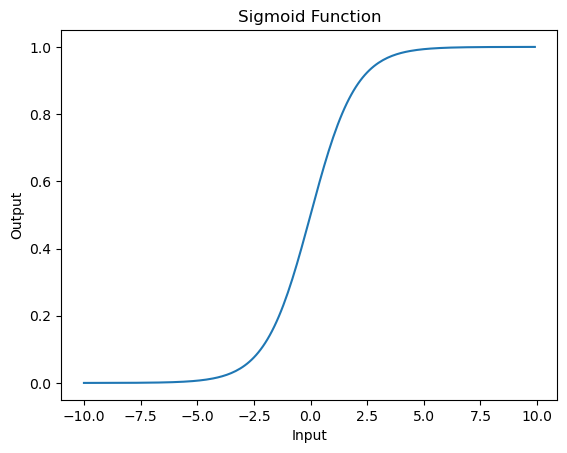

In [1]:
from math import exp
import matplotlib.pyplot as plt

def activate_function(a_1):
    return 1.0 / (1.0 + exp(-a_1))

inputs = [x/10.0 for x in range(-100, 100)]
outputs = [activate_function(x) for x in inputs]

plt.plot(inputs, outputs)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Function')
plt.show()

* batch = 16, epochs = 10 Test Loss: 0.0043, 	 Test Accuracy: 97.98%
* batch = 32, epochs = 10 Test Loss: 0.0024, 	 Test Accuracy: 97.60%  
* batch = 64, epochs = 10 Test Loss: 0.0018, 	 Test Accuracy: 96.26% 
* batch = 128, epochs = 10 Test Loss: 0.0012, 	 Test Accuracy: 95.42% 
* batch = 16, epochs = 20 Test Loss: 0.0041, 	 Test Accuracy: 98.42%  
* batch = 32, epochs = 20 Test Loss: 0.0020, 	 Test Accuracy: 98.17% 
* batch = 64, epochs = 20 Test Loss: 0.0011, 	 Test Accuracy: 97.93% 
* batch = 128, epochs = 20 Test Loss: 0.0009, 	 Test Accuracy: 96.46% 

#### The best score is <batch 16, epochs 20> _> 

### 과제
* Backpropagation 코드 각 함수 별 어떤 의미가 있는지 주석 달아보기
* MLP 모델에서 SGD optim 의 paramter, Bath-size, epoch 조정 해서 성능 올려보기